<a href="https://colab.research.google.com/github/Zedbog/Data_science_course/blob/main/ML_klasyfikacja_homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mieszkania w poznaniu - gratka.pl

In [ ]:
from google.colab import drive

In [ ]:
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import  LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
import seaborn as sns

In [ ]:
gratkapl_centrum = pd.read_csv('/content/drive/MyDrive/ML_klasyfikacja/gratkapl-centrenrm.csv', index_col=0)

In [ ]:
gratkapl_centrum.head()

,Expected,Rooms,SqrMeters,Floor,Location,Centre,Description
Id,,,,,,,
3914,386064,2,46.0,3,Poznań Stare Miasto Wilda ul. Maratońska Łęgi ...,1,OFERTA ZWOLNIONA Z PROWIZJI OD KUPUJĄCEGO! OFE...
437,280000,2,41.0,5,Poznań Poznań-Wilda,0,Polecam do sprzedaży mieszkanie dwupokojowe pr...
1139,329000,2,50.5,1,Poznań Ogrody,0,Polecam na sprzedaż mieszkanie 2-pokojowe na p...
4377,225000,2,43.0,10,Poznań Grunwald Łazarz Górczyn Ogrody Je ul. N...,1,BEZPIECZNA TRANSAKCJA JEDYNIE Z DOŚWIADCZONYM ...
192,280000,2,69.0,3,Poznań Wilda ul. Traugutta,0,Salon nieruchomości Iron House poleca na sprze...


In [ ]:
X = gratkapl_centrum.iloc[:,:4]

In [ ]:
X.head()

,Expected,Rooms,SqrMeters,Floor
Id,,,,
3914,386064,2,46.0,3
437,280000,2,41.0,5
1139,329000,2,50.5,1
4377,225000,2,43.0,10
192,280000,2,69.0,3


In [ ]:
y = gratkapl_centrum.Centre

In [ ]:
y.head()

Id
3914    1
437     0
1139    0
4377    1
192     0
Name: Centre, dtype: int64

Podział na zbiory treningowy i testowy wraz z uczniem modelu

In [ ]:
np.unique(y, return_counts=True)

(array([0, 1]), array([1500,  518]))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
np.unique(y_train, return_counts=True), np.unique(y_test, return_counts=True)

((array([0, 1]), array([1200,  414])), (array([0, 1]), array([300, 104])))

In [ ]:
# parameters = {
#     'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
#     'solver': ['newton-cg','saga', 'liblinear', 'lbfgs'],
#     'max_iter': [100, 500, 1000, 5000]
# }

# clf = GridSearchCV(LogisticRegression(), parameters)
# clf.fit(X_train, y_train)
# clf.best_params_

Implementujeję najlepsze parametry modelu

In [ ]:
model = LogisticRegression(C=0.1, solver='newton-cg')

In [ ]:
model.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)

[[298   2]
 [ 99   5]]
              precision    recall  f1-score   support

           0       0.75      0.99      0.86       300
           1       0.71      0.05      0.09       104

    accuracy                           0.75       404
   macro avg       0.73      0.52      0.47       404
weighted avg       0.74      0.75      0.66       404



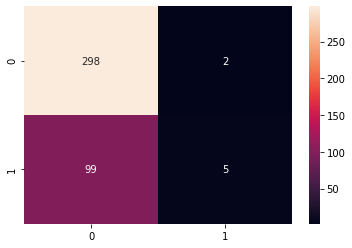

In [ ]:
print(cm)
sns.heatmap(cm, annot=True, fmt='d')
print(classification_report(y_test, y_pred))

298 mieszkań, które nie są w centrum, model wytypował poprawnie. Pomylił się co do 2-óch, które uznał, że są w centrum, a nie są.
99 mieszkań model uznał, że nie są w centrum a są. Tylko 5 mieszkań, które są w centrum, model przewidział poprawnie.
Model skutecznie określa jedynie mieszkania, które nie są w cetrum, a to dlatego, że, pomimo zbalansowanego podziału zbiorów treningowego i testowego, zdecydowana liczba mieszkań 'NIE w CENTRUM' przeważa w badanym zbiorze danych 1500 do 518.

#Model na zbalansowanych danych

Tworzę model, który będzie bazował na innych proporcjach mieszkań w CENTRUM do ty NIE w CENTRUM.

In [ ]:
gratkapl_centrum = gratkapl_centrum.sort_values('Centre')

In [ ]:
gratkapl_centrum_2x518_negative = gratkapl_centrum.iloc[1500-(2*518):, :]

In [ ]:
X_2x518 = gratkapl_centrum_2x518_negative.iloc[:,:4]

In [ ]:
y_2x518 = gratkapl_centrum_2x518_negative.Centre

In [ ]:
np.unique(y_2x518, return_counts=True)

(array([0, 1]), array([1036,  518]))

In [ ]:
X_2x518_train, X_2x518_test, y_2x518_train, y_2x518_test = train_test_split(X_2x518, y_2x518, test_size=0.2, random_state=42, stratify=y_2x518)

In [ ]:
model.fit(X_2x518_train, y_2x518_train)
y_2x518_pred = model.predict(X_2x518_test)
cm = confusion_matrix(y_2x518_test, y_2x518_pred)

/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[[204   3]
 [ 97   7]]
              precision    recall  f1-score   support

           0       0.68      0.99      0.80       207
           1       0.70      0.07      0.12       104

    accuracy                           0.68       311
   macro avg       0.69      0.53      0.46       311
weighted avg       0.69      0.68      0.58       311



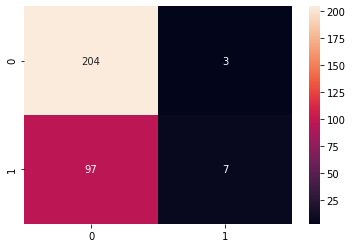

In [ ]:
print(cm)
sns.heatmap(cm, annot=True, fmt='d')
print(classification_report(y_2x518_test, y_2x518_pred))

In [ ]:
y_pred2 = model.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred2)

[[292   8]
 [ 89  15]]
              precision    recall  f1-score   support

           0       0.77      0.97      0.86       300
           1       0.65      0.14      0.24       104

    accuracy                           0.76       404
   macro avg       0.71      0.56      0.55       404
weighted avg       0.74      0.76      0.70       404



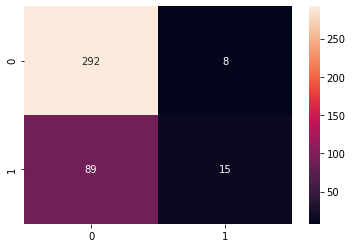

In [ ]:
print(cm)
sns.heatmap(cm, annot=True, fmt='d')
print(classification_report(y_test, y_pred2))

Powyższa macierz pomyłek reprezentuje skuteczność modelu przy zbiorze danych z proporcjami 2:1 mieszkań NIE w CENTRUM do tych w CENTRUM 

Rozpatrzmy jeszcze zrównoważone proporcje mieszkań tj. 1:1

In [ ]:
gratkapl_centrum_518_negative = gratkapl_centrum.iloc[1500-(1*518):, :]
X_518 = gratkapl_centrum_518_negative.iloc[:,:4]
y_518 = gratkapl_centrum_518_negative.Centre
np.unique(y_518, return_counts=True)

(array([0, 1]), array([518, 518]))

In [ ]:
X_518_train, X_518_test, y_518_train, y_518_test = train_test_split(X_518, y_518, test_size=0.2, random_state=42, stratify=y_518)
model.fit(X_518_train, y_518_train)
y_518_pred = model.predict(X_518_test)
cm = confusion_matrix(y_518_test, y_518_pred)

/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[[63 41]
 [46 58]]
              precision    recall  f1-score   support

           0       0.58      0.61      0.59       104
           1       0.59      0.56      0.57       104

    accuracy                           0.58       208
   macro avg       0.58      0.58      0.58       208
weighted avg       0.58      0.58      0.58       208



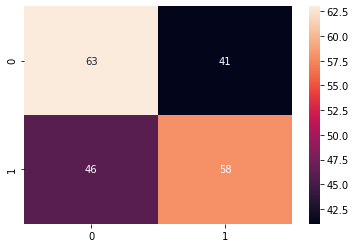

In [ ]:
print(cm)
sns.heatmap(cm, annot=True, fmt='d')
print(classification_report(y_518_test, y_518_pred))

In [ ]:
y_pred1 = model.predict(X_test)


In [ ]:
cm = confusion_matrix(y_test, y_pred1)

[[193 107]
 [ 45  59]]
              precision    recall  f1-score   support

           0       0.81      0.64      0.72       300
           1       0.36      0.57      0.44       104

    accuracy                           0.62       404
   macro avg       0.58      0.61      0.58       404
weighted avg       0.69      0.62      0.65       404



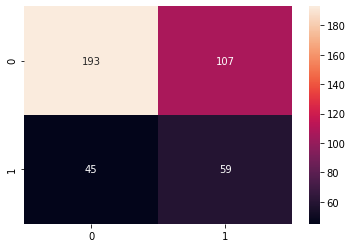

In [ ]:
print(cm)
sns.heatmap(cm, annot=True, fmt='d')
print(classification_report(y_test, y_pred1))

Powyższa macierz pomyłek reprezentuje skuteczność modelu przy zbiorze danych z proporcjami 518:518 mieszkań NIE w CENTRUM do tych w CENTRUM. Jak widać znacznie poprawiła się skuteczność modelu dla predykcji mieszkań w CENTRUM. Model pozytywnie wykrył 59 mieszkań w centrum. 45 mieszkań, które są w CENTRUM, model sklasyfikował, że nie są. Spadła zarazem skutecznośc predykcji modelu mieszkań NIE w CENTRUM. 194 mieszkania NIE w CENTRUM model trafnie przewidział, jednak aż 106 mieszkań, które NIE są w CENTRUM, model ocenił, że są. Reasumując, model, który uczył się na bardziej zrównoważonym w proporcjach W CENTRUM : NIE W CENTRUM zbiorze danych uzyskuje większą zdolność wykrywania mieszkań w CENTRUM i tym samym realizacji postawionego mu zadania. Kompletny, bazowy zbiór danych, jako źródło do nauki modelu, praktycznie to uniemożliwiał.

Określamy sobie model na losowo wybranych danych z naszej puli i sprawdzamy skuteczność modelu.

In [ ]:
from sklearn.dummy import DummyClassifier #dobiera losowe dany wg narzuconej strategii

In [ ]:
random_dummy = DummyClassifier(strategy='uniform')
freq_dummy = DummyClassifier(strategy='most_frequent')
strat_dummy = DummyClassifier(strategy='stratified')

In [ ]:
print(classification_report(y_test, random_dummy.fit(X_train, y_train).predict(X_test)))

              precision    recall  f1-score   support

           0       0.75      0.51      0.61       300
           1       0.27      0.51      0.35       104

    accuracy                           0.51       404
   macro avg       0.51      0.51      0.48       404
weighted avg       0.63      0.51      0.54       404



In [ ]:
print(classification_report(y_test, freq_dummy.fit(X_train, y_train).predict(X_test)))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85       300
           1       0.00      0.00      0.00       104

    accuracy                           0.74       404
   macro avg       0.37      0.50      0.43       404
weighted avg       0.55      0.74      0.63       404



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(classification_report(y_test, strat_dummy.fit(X_train, y_train).predict(X_test)))

              precision    recall  f1-score   support

           0       0.74      0.74      0.74       300
           1       0.25      0.26      0.26       104

    accuracy                           0.61       404
   macro avg       0.50      0.50      0.50       404
weighted avg       0.62      0.61      0.62       404



In [ ]:
pd.set_option('display.float_format', lambda x: '%.3f' %x)
gratkapl_centrum.describe()

,Expected,Rooms,SqrMeters,Floor,Centre
count,2018.000,2018.000,2018.000,2018.000,2018.000
mean,369476.379,2.442,57.465,2.898,0.257
std,1247583.390,0.935,24.340,2.414,0.437
min,1.000,1.000,14.370,1.000,0.000
25%,236604.750,2.000,42.000,1.000,0.000
50%,290000.000,2.000,51.000,2.000,0.000
75%,359000.000,3.000,66.000,4.000,1.000
max,36378404.000,6.000,257.000,16.000,1.000


In [ ]:
from sklearn.decomposition import PCA # służy do redukcji wymiarów
import matplotlib.pyplot as plt

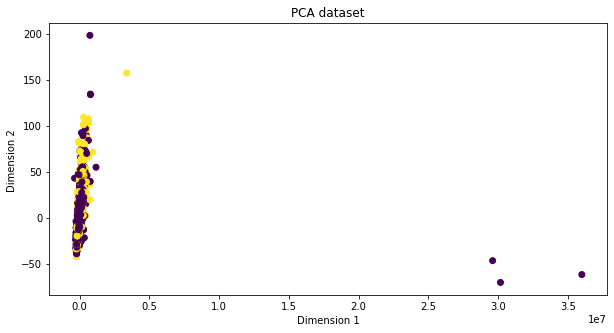

In [ ]:
plt.figure(figsize=(10, 5))
X_pca = PCA().fit_transform(X)
plt.title('PCA dataset')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2 ')
plt.scatter(X_pca[:,0], X_pca[:,1], c=y)

trzeba popzbyć się powyższych outlaierów

In [ ]:
Q1 = gratkapl_centrum.quantile(0.25)
Q3 = gratkapl_centrum.quantile(0.75)
IQR = Q3 - Q1
gratkapl_centrum_filtered = gratkapl_centrum[~((gratkapl_centrum < (Q1 - 1.5 * IQR)) | (gratkapl_centrum > (Q3 + 1.5 * IQR))).any(axis=1)]

In [ ]:
gratkapl_centrum.shape, gratkapl_centrum_filtered.shape

((2018, 7), (1733, 7))

In [ ]:
gratkapl_centrum_filtered.describe()

,Expected,Rooms,SqrMeters,Floor,Centre
count,1733.000,1733.000,1733.000,1733.000,1733.000
mean,290569.872,2.305,52.159,2.559,0.236
std,84591.813,0.818,15.963,1.703,0.425
min,68000.000,1.000,14.370,1.000,0.000
25%,229000.000,2.000,40.340,1.000,0.000
50%,280973.000,2.000,49.290,2.000,0.000
75%,339000.000,3.000,62.480,4.000,0.000
max,540000.000,4.000,102.000,8.000,1.000


In [ ]:
X = gratkapl_centrum_filtered[['Expected', 'Rooms', 'SqrMeters', 'Floor']]
y = gratkapl_centrum_filtered['Centre']

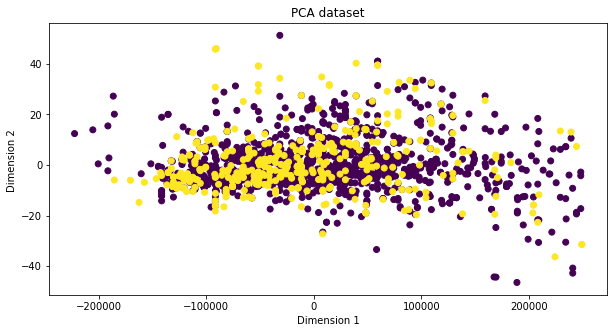

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
X_pca = PCA().fit_transform(X)
plt.title('PCA dataset')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2 ')
plt.scatter(X_pca[:,0], X_pca[:,1], c=y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [ ]:
# parameters = {
#     'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
#     'solver': ['newton-cg','saga', 'liblinear', 'lbfgs'],
#     'max_iter': [100, 500, 1000, 5000],
#     'penalty': ['l1', 'l2'],
#     'class_weight':[None, 'balanced']
# }

# clf = GridSearchCV(LogisticRegression(), parameters)
# clf.fit(X_train, y_train)
# clf.best_params_

In [ ]:
model = LogisticRegression(C=0.1, solver='liblinear', max_iter=5000, penalty= 'l1', class_weight=None)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

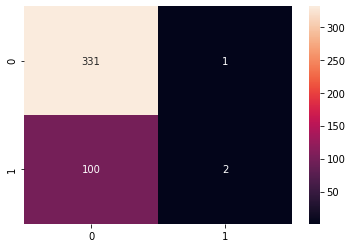

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87       332
           1       0.67      0.02      0.04       102

    accuracy                           0.77       434
   macro avg       0.72      0.51      0.45       434
weighted avg       0.74      0.77      0.67       434



Dokonuję standaryzacji danych

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# standaryzacja = liczymy średnią i dzielimy przez odchylenie standardowe
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [ ]:
model.fit(X_train_sc, y_train)
y_pred = model.predict(X_test_sc)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87       332
           1       1.00      0.01      0.02       102

    accuracy                           0.77       434
   macro avg       0.88      0.50      0.44       434
weighted avg       0.82      0.77      0.67       434



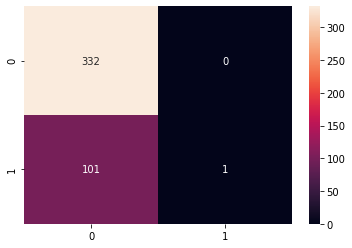

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87       332
           1       1.00      0.01      0.02       102

    accuracy                           0.77       434
   macro avg       0.88      0.50      0.44       434
weighted avg       0.82      0.77      0.67       434



#Knn

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Create and fit the model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict on the test features, print the results
y_pred_knn = knn.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# average:
#   None - wyniki dla każdej klasy osobno
#   'binary' - dla wybranej w `pos_label` etykiety
#   'micro' - dla całkowitej liczby TP, FN, FP
#   'macro' - nieważona średnia dla każdej klasy
#   'weighted' - ważona średnia dla każdej klasy

def calculate_metrics(target, prediction, average='micro'):
    accuracy = accuracy_score(target, prediction)
    precision = precision_score(target, prediction, average=average)
    recall = recall_score(target, prediction, average=average)
    f1 = f1_score(target, prediction, average=average)
    mislabeled = (target != prediction).sum()
    total = len(target)
    return accuracy, precision, recall, f1, mislabeled, total

def print_results(metrics, classifier_id='classifier'):
    print(f'Results for {classifier_id}')
    print('----')
    print(f'  Accuracy:  {metrics[0]}')
    print(f'  Precision: {metrics[1]}')
    print(f'  Recall:    {metrics[2]}')
    print(f'  F1 score:  {metrics[3]}')
    print(f'  Mislabeled {metrics[4]} out of {metrics[5]}')
    print('\n')

In [ ]:
print_results(calculate_metrics(y_test, y_pred_knn), 'kNN')

Results for kNN
----
  Accuracy:  0.7396313364055299
  Precision: 0.7396313364055299
  Recall:    0.7396313364055299
  F1 score:  0.7396313364055299
  Mislabeled 113 out of 434




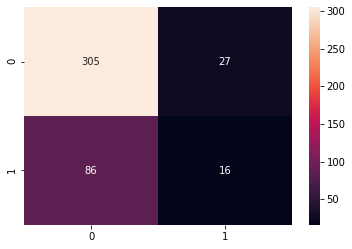

In [ ]:
cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True, fmt='d')

In [ ]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.78      0.92      0.84       332
           1       0.37      0.16      0.22       102

    accuracy                           0.74       434
   macro avg       0.58      0.54      0.53       434
weighted avg       0.68      0.74      0.70       434



In [ ]:
params_knn= {
    'n_neighbors': [2, 3, 5, 7, 10, 15],
    'algorithm': ['auto','ball_tree', 'kd_tree'],
    'p': [1, 2]
}

clf = GridSearchCV(KNeighborsClassifier(), params_knn)
clf.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree'],
                         'n_neighbors': [2, 3, 5, 7, 10, 15], 'p': [1, 2]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
clf.best_params_

{'algorithm': 'ball_tree', 'n_neighbors': 10, 'p': 1}

In [ ]:
knn = KNeighborsClassifier(n_neighbors=10, algorithm='ball_tree', p=1)

Results for kNN
----
  Accuracy:  0.7511520737327189
  Precision: 0.7511520737327189
  Recall:    0.7511520737327189
  F1 score:  0.7511520737327188
  Mislabeled 108 out of 434




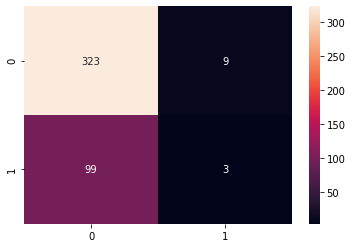

In [ ]:
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print_results(calculate_metrics(y_test, y_pred_knn), 'kNN')
cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True, fmt='d')

In [ ]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.77      0.97      0.86       332
           1       0.25      0.03      0.05       102

    accuracy                           0.75       434
   macro avg       0.51      0.50      0.45       434
weighted avg       0.64      0.75      0.67       434



#SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
# Train a linear SVM
svm = SVC(kernel="linear")
svm.fit(X_train, y_train)

# Make a new data set keeping only the support vectors
print("Number of original examples", len(X_train))
print("Number of support vectors", len(svm.support_))

Number of original examples 1299
Number of support vectors 483


In [ ]:
# params_svc= {
#     'C': [0.1, 1, 10],
#     'kernel': ['linear'],
#     'gamma':[0.0001, 0.01, 0.1],
#    # 'class_weight': [None, 'balanced']
# }

# clf = GridSearchCV(SVC(), params_svc)
# clf.fit(X_train, y_train)
# clf.best_params_

In [ ]:
svc = SVC(C=1000, gamma=0.001)

Results for SVC
----
  Accuracy:  0.7050691244239631
  Precision: 0.7050691244239631
  Recall:    0.7050691244239631
  F1 score:  0.7050691244239631
  Mislabeled 128 out of 434




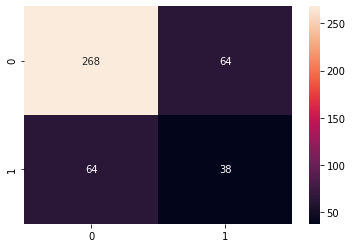

In [ ]:
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
print_results(calculate_metrics(y_test, y_pred_svc), 'SVC')
cm_svc = confusion_matrix(y_test, y_pred_svc)
sns.heatmap(cm_svc, annot=True, fmt='d')

In [ ]:
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       332
           1       0.37      0.37      0.37       102

    accuracy                           0.71       434
   macro avg       0.59      0.59      0.59       434
weighted avg       0.71      0.71      0.71       434



In [ ]:
# Normalizacja danych\
from sklearn.preprocessing import normalize

In [ ]:
X_normalized = normalize(X, norm='l2')

In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
 # Kroswalidacja
 from sklearn.model_selection import StratifiedKFold

In [ ]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for train, test in cv.split(X, y):
  X_train_kfold, y_train_kfold = X.iloc[train], y.iloc[train]
  X_test_kfold, y_test_kfold = X.iloc[test], y.iloc[test]
  

In [ ]:
log_clf = LogisticRegression(C=0.1, solver='liblinear', max_iter=5000, penalty= 'l1', class_weight=None)
knn_clf = KNeighborsClassifier(n_neighbors=10, algorithm='ball_tree', p=1)
svc_clf = SVC(C=1000, gamma=0.001)

In [ ]:
voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('knn', knn_clf), ('svm', svc_clf)], voting='hard')

In [ ]:
for clf in (log_clf, knn_clf, svc_clf, voting_clf):
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(f"{clf.__class__.__name__}:\n {classification_report(y_test, y_pred)}")

LogisticRegression:
               precision    recall  f1-score   support

           0       0.77      1.00      0.87       332
           1       1.00      0.02      0.04       102

    accuracy                           0.77       434
   macro avg       0.88      0.51      0.45       434
weighted avg       0.82      0.77      0.67       434

KNeighborsClassifier:
               precision    recall  f1-score   support

           0       0.77      0.97      0.86       332
           1       0.25      0.03      0.05       102

    accuracy                           0.75       434
   macro avg       0.51      0.50      0.45       434
weighted avg       0.64      0.75      0.67       434

SVC:
               precision    recall  f1-score   support

           0       0.81      0.81      0.81       332
           1       0.37      0.37      0.37       102

    accuracy                           0.71       434
   macro avg       0.59      0.59      0.59       434
weighted avg       0.71 

#Naive Bayes i decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB

In [ ]:
#Zastosowanie Pipeline
from sklearn.pipeline import Pipeline

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [ ]:
# Just initialize the pipeline with any estimator you like    
pipe = Pipeline(steps=[('estimator', DecisionTreeClassifier())])

# Add a dict of estimator and estimator related parameters in this list
params_grid = [
    {
        'estimator':[DecisionTreeClassifier()],
        'estimator__criterion': ['gini', 'entropy'],
        'estimator__max_depth': [3, 5, 7, 9, 12, 15],
        'estimator__min_samples_split': [2, 4, 7],
        'estimator__min_samples_leaf': [1, 3, 5]
    },
    {
        'estimator': [GaussianNB()]
    },
    {
        'estimator':[MultinomialNB()],
    }
    # {'estimator':[Any_other_estimator_you_want],
    #  'estimator__valid_param_of_your_estimator':[valid_values]
]

clf = GridSearchCV(pipe, params_grid, scoring='recall')
clf.fit(X_train, y_train)
clf.best_params_

{'estimator': DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=15, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=4,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=None, splitter='best'),
 'estimator__criterion': 'gini',
 'estimator__max_depth': 15,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 4}

a teraz sprawdźmy kazdy z modeli, żeby zweryfikować

In [ ]:
# params_tree = {
#     'criterion': ['gini', 'entropy'],
#     'max_depth': [3, 5, 7, 9, 12, 15],
#     'min_samples_split': [2, 4, 7],
#     'min_samples_leaf': [1, 3, 5]
# }

# clf = GridSearchCV(DecisionTreeClassifier(), params_tree)
# clf.fit(X_train, y_train)
# clf.best_params_

Decision Tree Classifier 
              precision    recall  f1-score   support

           0       0.78      0.98      0.87       332
           1       0.64      0.09      0.16       102

    accuracy                           0.77       434
   macro avg       0.71      0.54      0.51       434
weighted avg       0.75      0.77      0.70       434



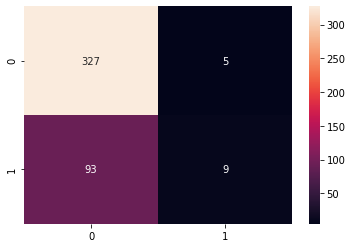

In [ ]:
model_tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5, min_samples_split=2)
model_tree.fit(X_train, y_train)
y_pred_tree = model_tree.predict(X_test)
print(f'Decision Tree Classifier \n{classification_report(y_test, y_pred_tree)}')
cm_tree = confusion_matrix(y_test, y_pred_tree)
sns.heatmap(cm_tree, annot=True, fmt='d')

GNB 
              precision    recall  f1-score   support

           0       0.76      1.00      0.87       332
           1       0.00      0.00      0.00       102

    accuracy                           0.76       434
   macro avg       0.38      0.50      0.43       434
weighted avg       0.59      0.76      0.66       434



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


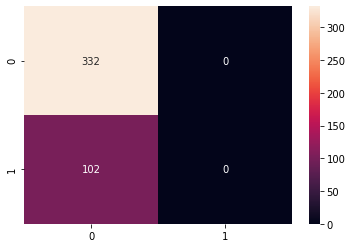

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)
print(f'GNB \n{classification_report(y_test, y_pred_gnb)}')
cm_gnb = confusion_matrix(y_test, y_pred_gnb)
sns.heatmap(cm_gnb, annot=True, fmt='d')

a dla danych standaryzowanych?

GNB 
              precision    recall  f1-score   support

           0       0.77      0.99      0.87       332
           1       0.33      0.01      0.02       102

    accuracy                           0.76       434
   macro avg       0.55      0.50      0.44       434
weighted avg       0.66      0.76      0.67       434



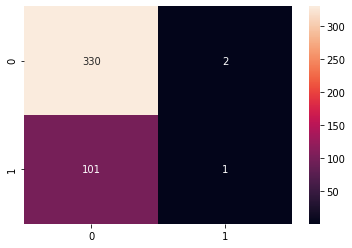

In [ ]:
gnb.fit(X_train_sc, y_train)
y_pred_gnb_sc = gnb.predict(X_test_sc)
print(f'GNB \n{classification_report(y_test, y_pred_gnb_sc)}')
cm_gnb_sc= confusion_matrix(y_test, y_pred_gnb_sc)
sns.heatmap(cm_gnb_sc, annot=True, fmt='d')

Niewielka poprawa dla danych standaryzowanych.

GNB 
              precision    recall  f1-score   support

           0       0.77      1.00      0.87       332
           1       1.00      0.01      0.02       102

    accuracy                           0.77       434
   macro avg       0.88      0.50      0.44       434
weighted avg       0.82      0.77      0.67       434



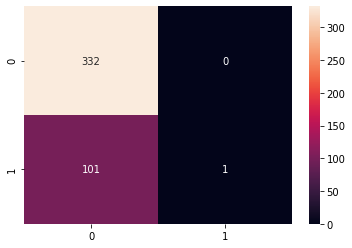

In [ ]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred_mnb = mnb.predict(X_test)
print(f'GNB \n{classification_report(y_test, y_pred_mnb)}')
cm_mnb = confusion_matrix(y_test, y_pred_mnb)
sns.heatmap(cm_mnb, annot=True, fmt='d')

dla danych standaryzowanych MultinomialNB nie zadziała, bo nie przyjmie wartości ujemnych. Sprawdźmy zatem jeszcze dane zdyskretyzowane.

In [ ]:
# Dyskretyzacja danych
from sklearn.preprocessing import KBinsDiscretizer

In [ ]:
kb = KBinsDiscretizer(n_bins=10, strategy='uniform')

In [ ]:
X_train_bin = kb.fit_transform(X_train)
X_test_bin = kb.transform(X_test)

GNB 
              precision    recall  f1-score   support

           0       0.77      0.95      0.85       332
           1       0.38      0.09      0.14       102

    accuracy                           0.75       434
   macro avg       0.57      0.52      0.50       434
weighted avg       0.68      0.75      0.69       434



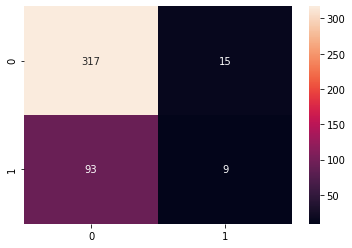

In [ ]:
mnb.fit(X_train_bin, y_train)
y_pred_mnb_bin = mnb.predict(X_test_bin)
print(f'GNB \n{classification_report(y_test, y_pred_mnb_bin)}')
cm_mnb_bin = confusion_matrix(y_test, y_pred_mnb_bin)
sns.heatmap(cm_mnb_bin, annot=True, fmt='d')

Sprawdźmy jeszcze wyniki dla GaussinaNB dla danych zdyskretyzowanych.

GNB 
              precision    recall  f1-score   support

           0       0.79      0.77      0.78       332
           1       0.31      0.33      0.32       102

    accuracy                           0.67       434
   macro avg       0.55      0.55      0.55       434
weighted avg       0.68      0.67      0.67       434



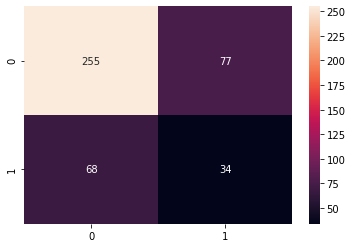

In [ ]:
gnb.fit(X_train_bin.toarray(), y_train)
y_pred_gnb_bin = gnb.predict(X_test_bin.toarray())
print(f'GNB \n{classification_report(y_test, y_pred_gnb_bin)}')
cm_gnb_bin= confusion_matrix(y_test, y_pred_gnb_bin)
sns.heatmap(cm_gnb_bin, annot=True, fmt='d')

GaussianNB i MultinomailNB dają jednakowe rezultaty przy odfiltrowanym zbiorze danych.Kiedy przeprowadzi się standaryzację, GaussianNB nieiwele się poprawia. Nie jest możliwe uzycie go z danymi dyskretnymi. Dyskretyzacja pomaga za to MultionamilNB(). Uzyskuje on nieco lepsze wyniki. Decision Tree Clasifier okazał sie najlepszy z nich. Sprawdźmy jeszcze drzewo na Gridsearchu dla scoring=recall:

In [ ]:
# params_tree = {
#     'criterion': ['gini', 'entropy'],
#     'max_depth': [3, 5, 7, 9, 12, 15],
#     'min_samples_split': [2, 4, 7],
#     'min_samples_leaf': [1, 3, 5]
# }

# clf = GridSearchCV(DecisionTreeClassifier(), params_tree,scoring='recall')
# clf.fit(X_train, y_train)
# clf.best_params_

Decision Tree Classifier 
              precision    recall  f1-score   support

           0       0.80      0.83      0.81       332
           1       0.37      0.33      0.35       102

    accuracy                           0.71       434
   macro avg       0.59      0.58      0.58       434
weighted avg       0.70      0.71      0.71       434



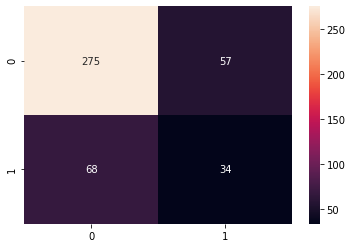

In [ ]:
model_tree = DecisionTreeClassifier(criterion='gini', max_depth=15, min_samples_leaf=1, min_samples_split=4)
model_tree.fit(X_train, y_train)
y_pred_tree = model_tree.predict(X_test)
print(f'Decision Tree Classifier \n{classification_report(y_test, y_pred_tree)}')
cm_tree = confusion_matrix(y_test, y_pred_tree)
sns.heatmap(cm_tree, annot=True, fmt='d')

Jak widać Gridsearch na recall przniósł bardzo dobry rezultat w stosunku do poprzedniego.

Sprawdźmy jeszcze model SVM dla danych zdyskretyzowanych i standaryzowanych

SVM 
              precision    recall  f1-score   support

           0       0.76      1.00      0.87       332
           1       0.00      0.00      0.00       102

    accuracy                           0.76       434
   macro avg       0.38      0.50      0.43       434
weighted avg       0.59      0.76      0.66       434



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


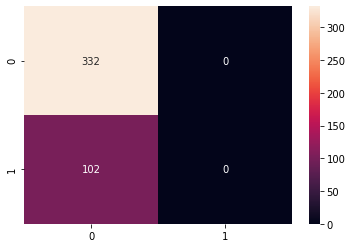

In [ ]:
svc.fit(X_train_sc, y_train)
y_pred_svc_sc = svc.predict(X_test_sc)
print(f'SVM \n{classification_report(y_test, y_pred_svc_sc)}')
cm_svc_sc = confusion_matrix(y_test, y_pred_svc_sc)
sns.heatmap(cm_svc_sc, annot=True, fmt='d')

SVM 
              precision    recall  f1-score   support

           0       0.76      0.98      0.86       332
           1       0.17      0.01      0.02       102

    accuracy                           0.76       434
   macro avg       0.47      0.50      0.44       434
weighted avg       0.62      0.76      0.66       434



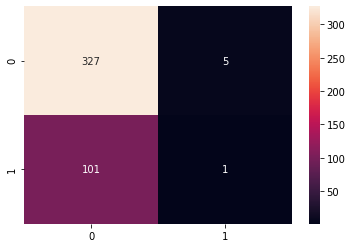

In [ ]:
svc.fit(X_train_bin, y_train)
y_pred_svc_bin = svc.predict(X_test_bin)
print(f'SVM \n{classification_report(y_test, y_pred_svc_bin)}')
cm_svc_bin = confusion_matrix(y_test, y_pred_svc_bin)
sns.heatmap(cm_svc_bin, annot=True, fmt='d')

A regresja logistyczna? dla zdyskretyzowanych danych?

Linear Regression 
              precision    recall  f1-score   support

           0       0.76      1.00      0.87       332
           1       0.00      0.00      0.00       102

    accuracy                           0.76       434
   macro avg       0.38      0.50      0.43       434
weighted avg       0.59      0.76      0.66       434



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


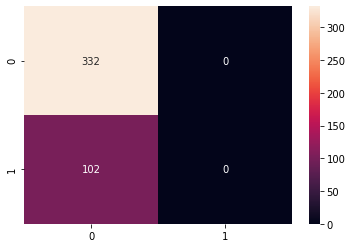

In [ ]:
model = LogisticRegression(C=0.1, solver='liblinear', max_iter=5000, penalty= 'l1', class_weight=None)
model.fit(X_train_bin, y_train)
y_pred_bin = model.predict(X_test_bin)
print(f'Linear Regression \n{classification_report(y_test, y_pred_bin)}')
cm = confusion_matrix(y_test, y_pred_bin)
sns.heatmap(cm, annot=True, fmt='d')

Dla LR uzyskano gorszy wynik niż na danych wejściowych.

#Bagging

In [ ]:
from sklearn.ensemble import BaggingClassifier

BaggingClassifier
              precision    recall  f1-score   support

           0       0.76      1.00      0.87       332
           1       0.00      0.00      0.00       102

    accuracy                           0.76       434
   macro avg       0.38      0.50      0.43       434
weighted avg       0.59      0.76      0.66       434



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


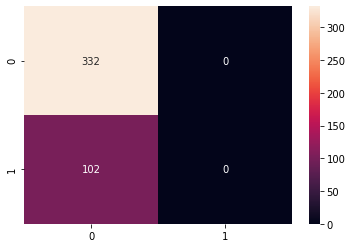

In [ ]:
model = BaggingClassifier(SVC())
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f'{model.__class__.__name__}\n{classification_report(y_test, y_pred)}')
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

In [ ]:
# params_bagging = {
#     'base_estimator': [SVC(C=1000, gamma=0.001), DecisionTreeClassifier(criterion='gini', max_depth=15, min_samples_leaf=1, min_samples_split=4),KNeighborsClassifier(n_neighbors=10, algorithm='ball_tree', p=1)],
#     # 'max_samples': [1, 3, 5, 10],
# }

# clf = GridSearchCV(BaggingClassifier(random_state=42), params_bagging)
# clf.fit(X_train, y_train)
# clf.best_params_

BaggingClassifier
              precision    recall  f1-score   support

           0       0.77      0.97      0.86       332
           1       0.41      0.07      0.12       102

    accuracy                           0.76       434
   macro avg       0.59      0.52      0.49       434
weighted avg       0.69      0.76      0.69       434



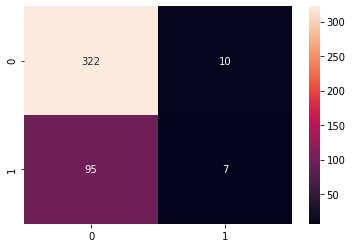

In [ ]:
model = BaggingClassifier(KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='minkowski',
                      metric_params=None, n_jobs=None, n_neighbors=10, p=1,
                      weights='uniform'))
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f'{model.__class__.__name__}\n{classification_report(y_test, y_pred)}')
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

#Boosting

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

AdaBoostClassifier
              precision    recall  f1-score   support

           0       0.78      0.98      0.87       332
           1       0.56      0.10      0.17       102

    accuracy                           0.77       434
   macro avg       0.67      0.54      0.52       434
weighted avg       0.73      0.77      0.70       434



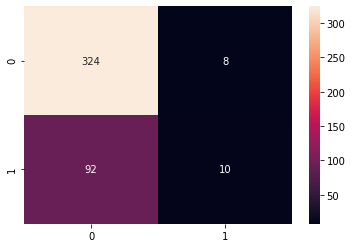

In [ ]:
model = AdaBoostClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f'{model.__class__.__name__}\n{classification_report(y_test, y_pred)}')
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

In [ ]:
# params_boosting = {
#     'base_estimator': [SVC(C=1000, gamma=0.001), DecisionTreeClassifier(criterion='gini', max_depth=15, min_samples_leaf=1, min_samples_split=4),KNeighborsClassifier(n_neighbors=10, algorithm='ball_tree', p=1)],
#     'algorithm': ['SAMME', 'SAMME.R'],
# }

# clf = GridSearchCV(AdaBoostClassifier(random_state=42), params_boosting)
# clf.fit(X_train, y_train)
# clf.best_params_

AdaBoostClassifier
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       332
           1       0.44      0.26      0.33       102

    accuracy                           0.75       434
   macro avg       0.62      0.58      0.59       434
weighted avg       0.72      0.75      0.72       434



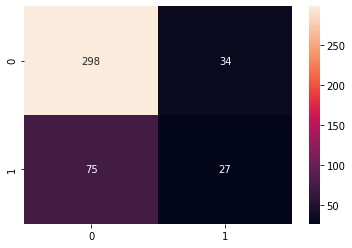

In [ ]:
model = AdaBoostClassifier(
    SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
     max_iter=-1, probability=False, random_state=None, shrinking=True,
     tol=0.001, verbose=False),
     algorithm='SAMME')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f'{model.__class__.__name__}\n{classification_report(y_test, y_pred)}')
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

#Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RandomForestClassifier
              precision    recall  f1-score   support

           0       0.82      0.91      0.86       332
           1       0.52      0.33      0.41       102

    accuracy                           0.77       434
   macro avg       0.67      0.62      0.63       434
weighted avg       0.75      0.77      0.75       434



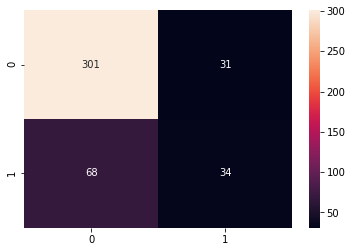

In [ ]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f'{model.__class__.__name__}\n{classification_report(y_test, y_pred)}')
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

In [ ]:
params_forest = {
    # 'n_estimators': [100, 200, 500],
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 15],
    'min_samples_split': [2, 4, 6, 9],
    # 'min_samples_leaf': [2, 3, 4, 5],
    # 'max_features': ['auto', None]
}

clf = GridSearchCV(RandomForestClassifier(random_state=42), params_forest,scoring='recall')
clf.fit(X_train, y_train)
clf.best_params_

RandomForestClassifier
              precision    recall  f1-score   support

           0       0.81      0.94      0.87       332
           1       0.59      0.29      0.39       102

    accuracy                           0.79       434
   macro avg       0.70      0.62      0.63       434
weighted avg       0.76      0.79      0.76       434



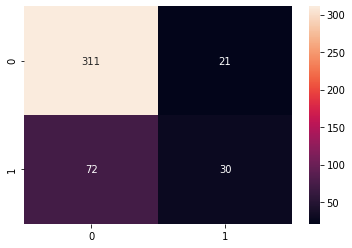

In [ ]:
model = RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_split=2)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f'{model.__class__.__name__}\n{classification_report(y_test, y_pred)}')
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

#Zestawienie wszystkich modeli

In [ ]:
# Zestawienie wszystkich modeli
log_clf = LogisticRegression(C=0.1, solver='liblinear', max_iter=5000, penalty= 'l1', class_weight=None)
knn_clf = KNeighborsClassifier(n_neighbors=10, algorithm='ball_tree', p=1)
svc_clf = SVC(C=1000, gamma=0.001)
tree_clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5, min_samples_split=2)
tree_recall_clf = DecisionTreeClassifier(criterion='gini', max_depth=15, min_samples_leaf=1, min_samples_split=4)
gnb_clf = GaussianNB()
mnb_clf = MultinomialNB()
voting_clf = VotingClassifier(
    estimators=[("svm", SVC(C=1000, gamma=0.001, probability=True)), ("knn", KNeighborsClassifier(n_neighbors=10, algorithm='ball_tree', p=1)), ("tree", DecisionTreeClassifier(criterion='gini', max_depth=15, min_samples_leaf=1, min_samples_split=4))],
    voting="soft" 
    )
bagging_clf = BaggingClassifier(KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='minkowski',
                                                     metric_params=None, n_jobs=None, n_neighbors=10, p=1,
                                                     weights='uniform'))
boosting_clf = AdaBoostClassifier(
    SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
        decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
        max_iter=-1, probability=False, random_state=None, shrinking=True,
        tol=0.001, verbose=False),
        algorithm='SAMME')
forest_clf = RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_split=2)

LogisticRegression:
               precision    recall  f1-score   support

         0.0       0.77      1.00      0.87      1324
         1.0       0.44      0.01      0.02       409

    accuracy                           0.76      1733
   macro avg       0.60      0.50      0.44      1733
weighted avg       0.69      0.76      0.67      1733



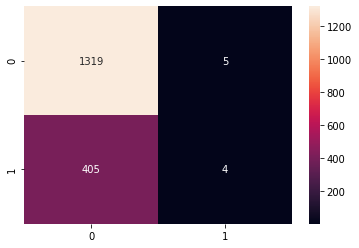

KNeighborsClassifier:
               precision    recall  f1-score   support

         0.0       0.77      0.97      0.86      1324
         1.0       0.38      0.06      0.10       409

    accuracy                           0.76      1733
   macro avg       0.58      0.51      0.48      1733
weighted avg       0.68      0.76      0.68      1733



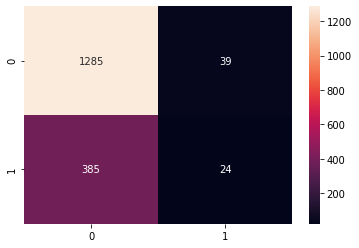

SVC:
               precision    recall  f1-score   support

         0.0       0.79      0.85      0.82      1324
         1.0       0.38      0.29      0.32       409

    accuracy                           0.72      1733
   macro avg       0.59      0.57      0.57      1733
weighted avg       0.70      0.72      0.71      1733



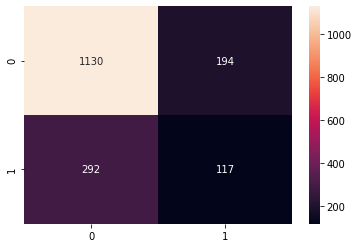

DecisionTreeClassifier:
               precision    recall  f1-score   support

         0.0       0.77      0.97      0.86      1324
         1.0       0.30      0.04      0.07       409

    accuracy                           0.75      1733
   macro avg       0.53      0.51      0.46      1733
weighted avg       0.66      0.75      0.67      1733



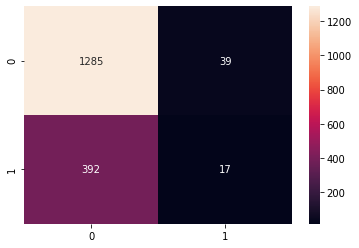

DecisionTreeClassifier:
               precision    recall  f1-score   support

         0.0       0.80      0.83      0.81      1324
         1.0       0.36      0.31      0.34       409

    accuracy                           0.71      1733
   macro avg       0.58      0.57      0.57      1733
weighted avg       0.69      0.71      0.70      1733



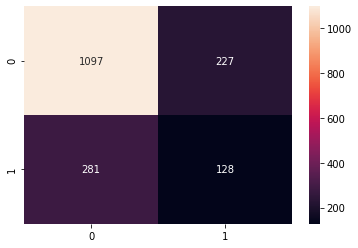

GaussianNB:
               precision    recall  f1-score   support

         0.0       0.76      1.00      0.87      1324
         1.0       0.00      0.00      0.00       409

    accuracy                           0.76      1733
   macro avg       0.38      0.50      0.43      1733
weighted avg       0.58      0.76      0.66      1733



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


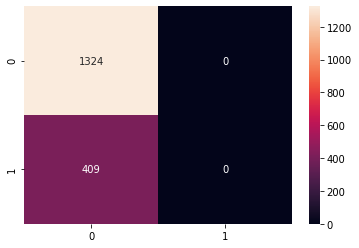

MultinomialNB:
               precision    recall  f1-score   support

         0.0       0.77      1.00      0.87      1324
         1.0       0.73      0.03      0.05       409

    accuracy                           0.77      1733
   macro avg       0.75      0.51      0.46      1733
weighted avg       0.76      0.77      0.68      1733



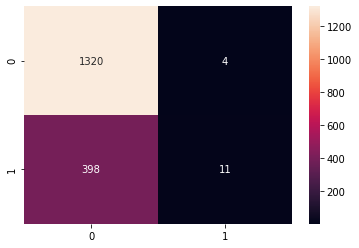

VotingClassifier:
               precision    recall  f1-score   support

         0.0       0.78      0.92      0.84      1324
         1.0       0.39      0.17      0.24       409

    accuracy                           0.74      1733
   macro avg       0.59      0.54      0.54      1733
weighted avg       0.69      0.74      0.70      1733



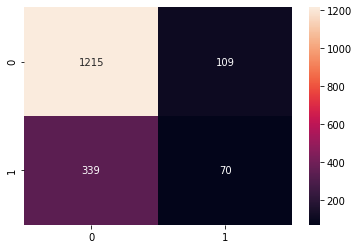

BaggingClassifier:
               precision    recall  f1-score   support

         0.0       0.77      0.96      0.85      1324
         1.0       0.33      0.07      0.12       409

    accuracy                           0.75      1733
   macro avg       0.55      0.51      0.48      1733
weighted avg       0.67      0.75      0.68      1733



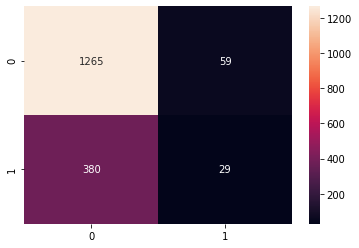

AdaBoostClassifier:
               precision    recall  f1-score   support

         0.0       0.78      0.89      0.83      1324
         1.0       0.37      0.20      0.26       409

    accuracy                           0.73      1733
   macro avg       0.57      0.55      0.55      1733
weighted avg       0.68      0.73      0.70      1733



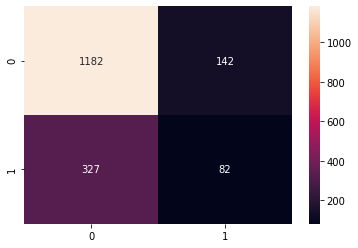

RandomForestClassifier:
               precision    recall  f1-score   support

         0.0       0.79      0.90      0.84      1324
         1.0       0.43      0.23      0.30       409

    accuracy                           0.74      1733
   macro avg       0.61      0.57      0.57      1733
weighted avg       0.71      0.74      0.72      1733



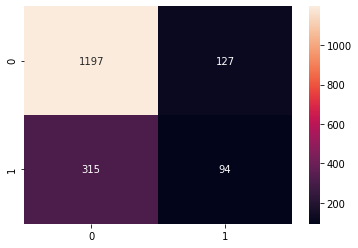

In [ ]:
# Kroswalidacja i wyniki dla wszystkich modeli
for clf in (log_clf, knn_clf, svc_clf, tree_clf, tree_recall_clf, gnb_clf, mnb_clf, voting_clf, bagging_clf, boosting_clf, forest_clf):
  predicted = []
  target = []
  for train_index, test_index in StratifiedKFold(n_splits=5, shuffle=True, random_state=42).split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf.fit(X=X_train, y=y_train)
    predicted = np.concatenate((predicted, clf.predict(X_test)))
    target = np.concatenate((target, y_test))
  print(f"{clf.__class__.__name__}:\n {classification_report(target, predicted)}")
  cm = confusion_matrix(target, predicted)
  sns.heatmap(cm, annot=True, fmt='d')
  plt.show()

#OVERSAMPLING danych

In [ ]:
from sklearn.datasets import make_classification
from sklearn.utils import resample # do oversamplingu

In [ ]:
X_train_rest, X_test_final, y_train_rest, y_test_final = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

LogisticRegression:
               precision    recall  f1-score   support

         0.0       0.96      1.00      0.98      1324
         1.0       0.00      0.00      0.00        62

    accuracy                           0.96      1386
   macro avg       0.48      0.50      0.49      1386
weighted avg       0.91      0.96      0.93      1386



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


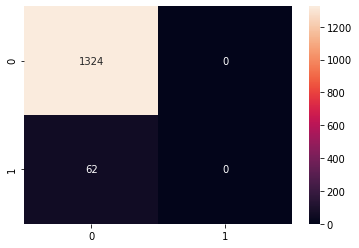

KNeighborsClassifier:
               precision    recall  f1-score   support

         0.0       0.96      1.00      0.98      1324
         1.0       0.00      0.00      0.00        62

    accuracy                           0.96      1386
   macro avg       0.48      0.50      0.49      1386
weighted avg       0.91      0.96      0.93      1386



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


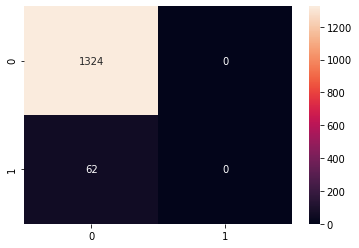

SVC:
               precision    recall  f1-score   support

         0.0       0.96      0.97      0.96      1324
         1.0       0.12      0.08      0.10        62

    accuracy                           0.93      1386
   macro avg       0.54      0.53      0.53      1386
weighted avg       0.92      0.93      0.93      1386



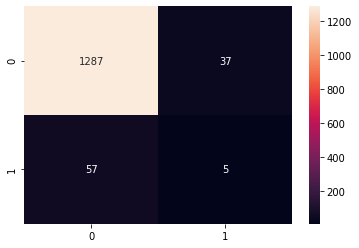

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


DecisionTreeClassifier:
               precision    recall  f1-score   support

         0.0       0.96      1.00      0.98      1324
         1.0       0.00      0.00      0.00        62

    accuracy                           0.96      1386
   macro avg       0.48      0.50      0.49      1386
weighted avg       0.91      0.96      0.93      1386



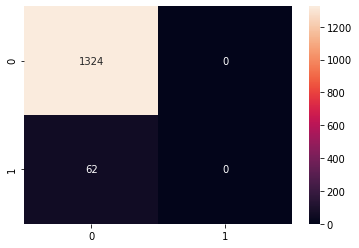

DecisionTreeClassifier:
               precision    recall  f1-score   support

         0.0       0.96      0.97      0.97      1324
         1.0       0.15      0.10      0.12        62

    accuracy                           0.93      1386
   macro avg       0.55      0.54      0.54      1386
weighted avg       0.92      0.93      0.93      1386



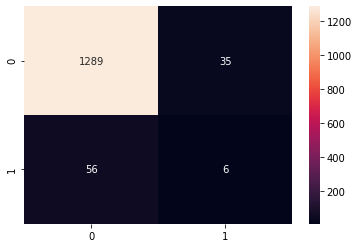

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


GaussianNB:
               precision    recall  f1-score   support

         0.0       0.96      1.00      0.98      1324
         1.0       0.00      0.00      0.00        62

    accuracy                           0.96      1386
   macro avg       0.48      0.50      0.49      1386
weighted avg       0.91      0.96      0.93      1386



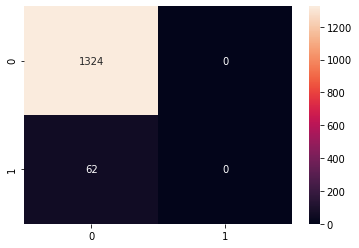

MultinomialNB:
               precision    recall  f1-score   support

         0.0       0.96      1.00      0.98      1324
         1.0       0.00      0.00      0.00        62

    accuracy                           0.96      1386
   macro avg       0.48      0.50      0.49      1386
weighted avg       0.91      0.96      0.93      1386



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


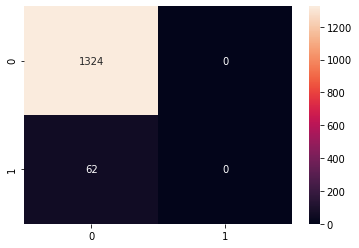

VotingClassifier:
               precision    recall  f1-score   support

         0.0       0.96      1.00      0.98      1324
         1.0       0.00      0.00      0.00        62

    accuracy                           0.96      1386
   macro avg       0.48      0.50      0.49      1386
weighted avg       0.91      0.96      0.93      1386



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


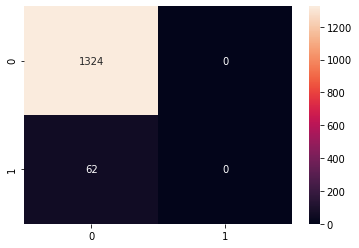

BaggingClassifier:
               precision    recall  f1-score   support

         0.0       0.96      1.00      0.98      1324
         1.0       0.00      0.00      0.00        62

    accuracy                           0.96      1386
   macro avg       0.48      0.50      0.49      1386
weighted avg       0.91      0.96      0.93      1386



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


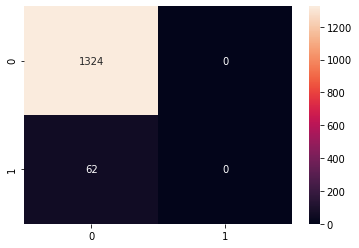

AdaBoostClassifier:
               precision    recall  f1-score   support

         0.0       0.96      0.98      0.97      1324
         1.0       0.17      0.08      0.11        62

    accuracy                           0.94      1386
   macro avg       0.57      0.53      0.54      1386
weighted avg       0.92      0.94      0.93      1386



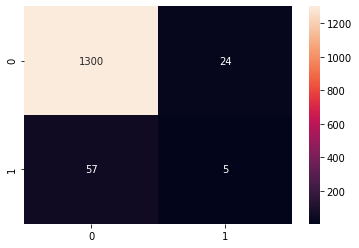

RandomForestClassifier:
               precision    recall  f1-score   support

         0.0       0.96      0.99      0.97      1324
         1.0       0.17      0.03      0.05        62

    accuracy                           0.95      1386
   macro avg       0.56      0.51      0.51      1386
weighted avg       0.92      0.95      0.93      1386



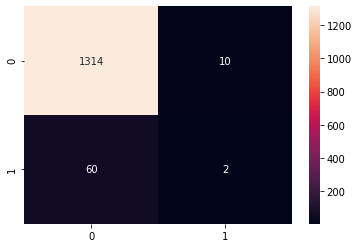

In [ ]:
# Kroswalidacja i wyniki dla wszystkich modeli
for clf in (log_clf, knn_clf, svc_clf, tree_clf, tree_recall_clf, gnb_clf, mnb_clf, voting_clf, bagging_clf, boosting_clf, forest_clf):
  predicted = []
  target = []
  for train_index, test_index in StratifiedKFold(n_splits=5, shuffle=True, random_state=42).split(X_train_rest, y_train_rest):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf.fit(X=X_train, y=y_train)
    predicted = np.concatenate((predicted, clf.predict(X_test)))
    target = np.concatenate((target, y_test))
  print(f"{clf.__class__.__name__}:\n {classification_report(target, predicted)}")
  cm = confusion_matrix(target, predicted)
  sns.heatmap(cm, annot=True, fmt='d')
  plt.show()

RandomForestClassifier
              precision    recall  f1-score   support

           0       0.82      0.93      0.87       265
           1       0.59      0.32      0.41        82

    accuracy                           0.79       347
   macro avg       0.70      0.62      0.64       347
weighted avg       0.76      0.79      0.76       347



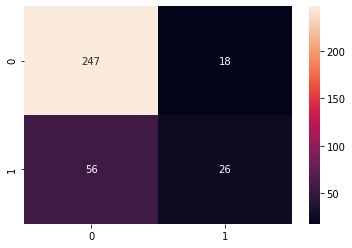

In [ ]:
model = RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_split=2)
model.fit(X_train_rest, y_train_rest)
y_pred = model.predict(X_test_final)
print(f'{model.__class__.__name__}\n{classification_report(y_test_final, y_pred)}')
cm = confusion_matrix(y_test_final, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

In [ ]:
y_train_rest.value_counts()

0    1059
1     327
Name: Centre, dtype: int64

In [ ]:
X_train_rest.head()

,Expected,Rooms,SqrMeters,Floor
Id,,,,
895,285000,2,44.000,4
720,182000,2,46.000,3
498,355000,4,74.000,1
1559,460000,4,80.000,2
2330,305000,2,45.000,1


In [ ]:
gratkapl_centrum_filtered_rest = pd.DataFrame(X_train_rest)
gratkapl_centrum_filtered_rest['Centre'] = y_train_rest

In [ ]:
gratkapl_centrum_filtered_rest.head()

,Expected,Rooms,SqrMeters,Floor,Centre
Id,,,,,
895,285000,2,44.000,4,0
720,182000,2,46.000,3,0
498,355000,4,74.000,1,0
1559,460000,4,80.000,2,1
2330,305000,2,45.000,1,1


In [ ]:
non_centre = gratkapl_centrum_filtered_rest[gratkapl_centrum_filtered_rest.Centre == 0]
centre = gratkapl_centrum_filtered_rest[gratkapl_centrum_filtered_rest.Centre == 1]

# Upsample minority class
centre_upsampled = resample(centre,
                            replace=True,    # sample with replacement
                            n_samples=1059,    # to match majority class
                            random_state=42) # reproducible results
 
# Combine majority class with upsampled minority class
gratkapl_centrum_filtered_rest_upsampled = pd.concat([non_centre, centre_upsampled])
 
# Display new class counts
gratkapl_centrum_filtered_rest_upsampled.Centre.value_counts()

1    1059
0    1059
Name: Centre, dtype: int64

Sprawdzenie, czy model zwórci lepsze rezultaty na takich danych

In [ ]:
X_upsample = gratkapl_centrum_filtered_rest_upsampled[['Expected', 'Rooms', 'SqrMeters', 'Floor']]
y_upsample = gratkapl_centrum_filtered_rest_upsampled['Centre']

In [ ]:
X.shape, y.shape, X_upsample.shape , y_upsample.shape

((1733, 4), (1733,), (2118, 4), (2118,))

LogisticRegression:
               precision    recall  f1-score   support

           0       0.61      0.61      0.61      1059
           1       0.61      0.60      0.61      1059

    accuracy                           0.61      2118
   macro avg       0.61      0.61      0.61      2118
weighted avg       0.61      0.61      0.61      2118



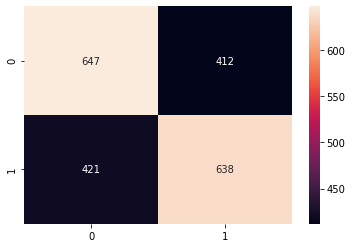

KNeighborsClassifier:
               precision    recall  f1-score   support

           0       0.64      0.59      0.62      1059
           1       0.62      0.66      0.64      1059

    accuracy                           0.63      2118
   macro avg       0.63      0.63      0.63      2118
weighted avg       0.63      0.63      0.63      2118



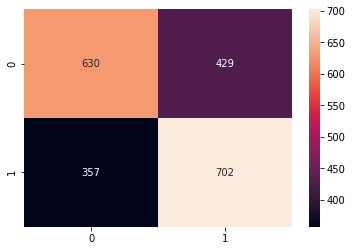

SVC:
               precision    recall  f1-score   support

           0       0.89      0.78      0.83      1059
           1       0.80      0.91      0.85      1059

    accuracy                           0.84      2118
   macro avg       0.85      0.84      0.84      2118
weighted avg       0.85      0.84      0.84      2118



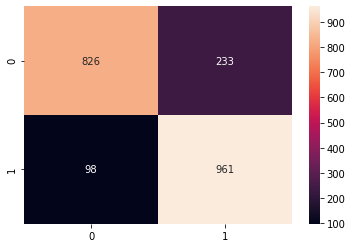

DecisionTreeClassifier:
               precision    recall  f1-score   support

           0       0.58      0.64      0.61      1059
           1       0.60      0.54      0.57      1059

    accuracy                           0.59      2118
   macro avg       0.59      0.59      0.59      2118
weighted avg       0.59      0.59      0.59      2118



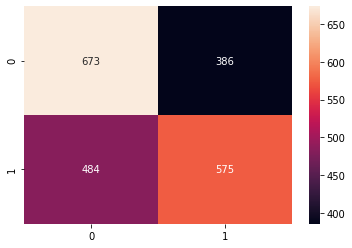

DecisionTreeClassifier:
               precision    recall  f1-score   support

           0       0.83      0.73      0.78      1059
           1       0.76      0.85      0.80      1059

    accuracy                           0.79      2118
   macro avg       0.79      0.79      0.79      2118
weighted avg       0.79      0.79      0.79      2118



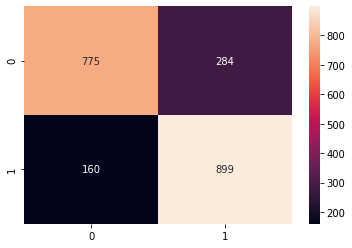

GaussianNB:
               precision    recall  f1-score   support

           0       0.55      0.65      0.60      1059
           1       0.57      0.47      0.52      1059

    accuracy                           0.56      2118
   macro avg       0.56      0.56      0.56      2118
weighted avg       0.56      0.56      0.56      2118



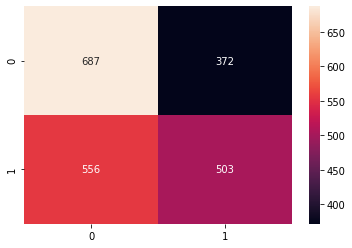

MultinomialNB:
               precision    recall  f1-score   support

           0       0.54      0.61      0.57      1059
           1       0.55      0.48      0.51      1059

    accuracy                           0.54      2118
   macro avg       0.54      0.54      0.54      2118
weighted avg       0.54      0.54      0.54      2118



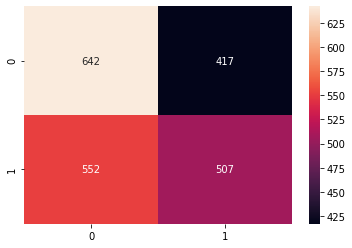

VotingClassifier:
               precision    recall  f1-score   support

           0       0.88      0.75      0.81      1059
           1       0.78      0.89      0.84      1059

    accuracy                           0.82      2118
   macro avg       0.83      0.82      0.82      2118
weighted avg       0.83      0.82      0.82      2118



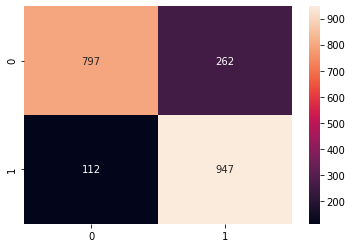

BaggingClassifier:
               precision    recall  f1-score   support

           0       0.65      0.51      0.57      1059
           1       0.60      0.73      0.66      1059

    accuracy                           0.62      2118
   macro avg       0.62      0.62      0.61      2118
weighted avg       0.62      0.62      0.61      2118



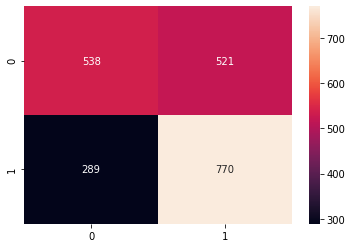

AdaBoostClassifier:
               precision    recall  f1-score   support

           0       0.82      0.74      0.78      1059
           1       0.76      0.84      0.80      1059

    accuracy                           0.79      2118
   macro avg       0.79      0.79      0.79      2118
weighted avg       0.79      0.79      0.79      2118



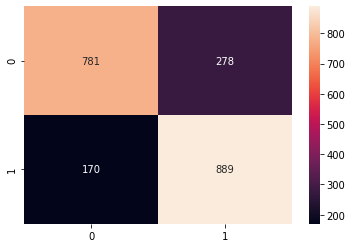

RandomForestClassifier:
               precision    recall  f1-score   support

           0       0.92      0.80      0.86      1059
           1       0.82      0.93      0.87      1059

    accuracy                           0.86      2118
   macro avg       0.87      0.86      0.86      2118
weighted avg       0.87      0.86      0.86      2118



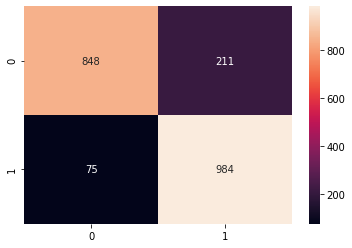

In [ ]:
# Kroswalidacja i wyniki dla wszystkich modeli
for clf in (log_clf, knn_clf, svc_clf, tree_clf, tree_recall_clf, gnb_clf, mnb_clf, voting_clf, bagging_clf, boosting_clf, forest_clf):
  predicted, true = [], []
  for train_index, test_index in StratifiedKFold(n_splits=5, shuffle=True, random_state=42).split(X_upsample, y_upsample):
    X_train, X_test = X_upsample.iloc[train_index], X_upsample.iloc[test_index]
    y_train, y_test = y_upsample.iloc[train_index], y_upsample.iloc[test_index]
    clf.fit(X=X_train, y=y_train)
    predicted.extend(clf.predict(X_test))
    true.extend(y_test)
  print(f"{clf.__class__.__name__}:\n {classification_report(true, predicted)}")
  cm = confusion_matrix(true, predicted)
  sns.heatmap(cm, annot=True, fmt='d')
  plt.show()

RandomForestClassifier
              precision    recall  f1-score   support

           0       0.83      0.80      0.81       265
           1       0.42      0.46      0.44        82

    accuracy                           0.72       347
   macro avg       0.62      0.63      0.63       347
weighted avg       0.73      0.72      0.73       347



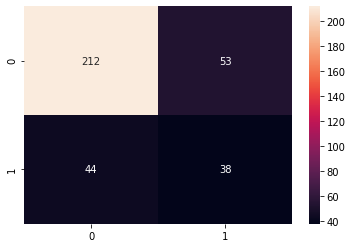

In [ ]:
print(f'{forest_clf.__class__.__name__}\n{classification_report(y_test_final, forest_clf.predict(X_test_final))}')
cm = confusion_matrix(y_test_final, forest_clf.predict(X_test_final))
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

SVC
              precision    recall  f1-score   support

           0       0.82      0.77      0.80       265
           1       0.38      0.45      0.41        82

    accuracy                           0.70       347
   macro avg       0.60      0.61      0.60       347
weighted avg       0.72      0.70      0.71       347



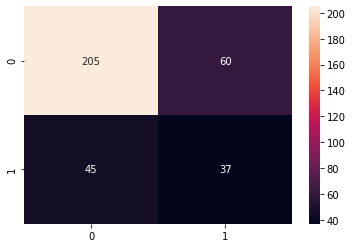

In [ ]:
print(f'{svc_clf.__class__.__name__}\n{classification_report(y_test_final, svc_clf.predict(X_test_final))}')
cm = confusion_matrix(y_test_final, svc_clf.predict(X_test_final))
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

W zestawieniu z OVERSAMPLING mieszkań w CENTRUM Random Forest okazał się najlepszy. Sprawdźmy jego wyniki dla bazowej próbki danych.

#UNDERSAMPLING

In [ ]:
y_train_rest.value_counts()

0    1059
1     327
Name: Centre, dtype: int64

In [ ]:
non_centre = gratkapl_centrum_filtered_rest[gratkapl_centrum_filtered_rest.Centre == 0]
centre = gratkapl_centrum_filtered_rest[gratkapl_centrum_filtered_rest.Centre == 1]

# Upsample minority class
non_centre_downsampled = resample(non_centre,
                            replace=False,    # sample with replacement
                            n_samples=327,    # to match majority class
                            random_state=42) # reproducible results
 
# Combine majority class with upsampled minority class
gratkapl_centrum_filtered_rest_downsampled = pd.concat([non_centre_downsampled, centre])
 
# Display new class counts
gratkapl_centrum_filtered_rest_downsampled.Centre.value_counts()

1    327
0    327
Name: Centre, dtype: int64

In [ ]:
X_downsample = gratkapl_centrum_filtered_rest_downsampled[['Expected', 'Rooms', 'SqrMeters', 'Floor']]
y_downsample = gratkapl_centrum_filtered_rest_downsampled['Centre']

In [ ]:
X_downsample.shape, y_downsample.shape

((654, 4), (654,))

LogisticRegression:
               precision    recall  f1-score   support

           0       0.59      0.64      0.61       327
           1       0.61      0.55      0.58       327

    accuracy                           0.60       654
   macro avg       0.60      0.60      0.60       654
weighted avg       0.60      0.60      0.60       654



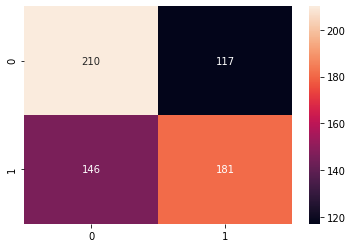

KNeighborsClassifier:
               precision    recall  f1-score   support

           0       0.53      0.67      0.59       327
           1       0.55      0.40      0.46       327

    accuracy                           0.53       654
   macro avg       0.54      0.53      0.53       654
weighted avg       0.54      0.53      0.53       654



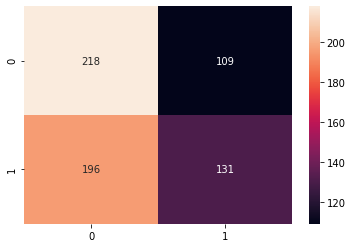

SVC:
               precision    recall  f1-score   support

           0       0.57      0.64      0.60       327
           1       0.59      0.52      0.55       327

    accuracy                           0.58       654
   macro avg       0.58      0.58      0.58       654
weighted avg       0.58      0.58      0.58       654



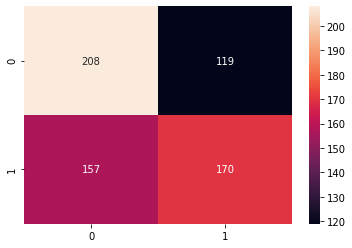

DecisionTreeClassifier:
               precision    recall  f1-score   support

           0       0.56      0.64      0.59       327
           1       0.57      0.49      0.53       327

    accuracy                           0.56       654
   macro avg       0.57      0.56      0.56       654
weighted avg       0.57      0.56      0.56       654



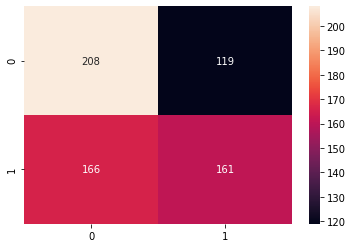

DecisionTreeClassifier:
               precision    recall  f1-score   support

           0       0.61      0.54      0.57       327
           1       0.59      0.65      0.62       327

    accuracy                           0.59       654
   macro avg       0.60      0.59      0.59       654
weighted avg       0.60      0.59      0.59       654



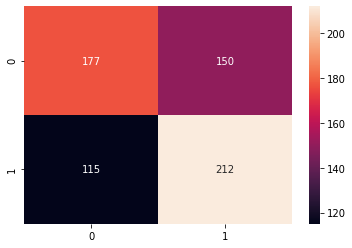

GaussianNB:
               precision    recall  f1-score   support

           0       0.54      0.60      0.57       327
           1       0.55      0.49      0.52       327

    accuracy                           0.55       654
   macro avg       0.55      0.55      0.54       654
weighted avg       0.55      0.55      0.54       654



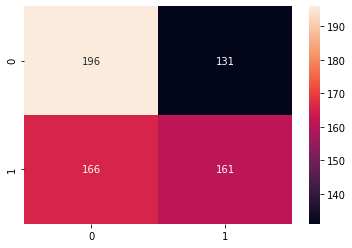

MultinomialNB:
               precision    recall  f1-score   support

           0       0.56      0.58      0.57       327
           1       0.56      0.54      0.55       327

    accuracy                           0.56       654
   macro avg       0.56      0.56      0.56       654
weighted avg       0.56      0.56      0.56       654



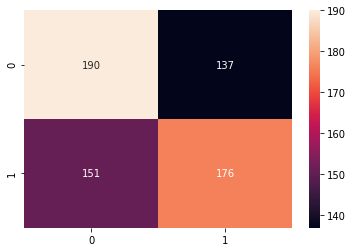

VotingClassifier:
               precision    recall  f1-score   support

           0       0.61      0.58      0.60       327
           1       0.60      0.63      0.62       327

    accuracy                           0.61       654
   macro avg       0.61      0.61      0.61       654
weighted avg       0.61      0.61      0.61       654



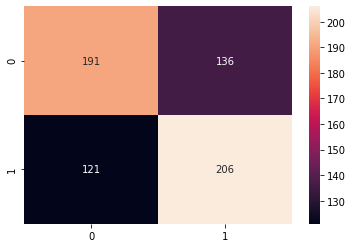

BaggingClassifier:
               precision    recall  f1-score   support

           0       0.54      0.51      0.53       327
           1       0.53      0.56      0.54       327

    accuracy                           0.54       654
   macro avg       0.54      0.54      0.53       654
weighted avg       0.54      0.54      0.53       654



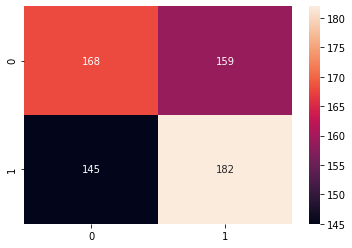

AdaBoostClassifier:
               precision    recall  f1-score   support

           0       0.57      0.72      0.64       327
           1       0.62      0.45      0.52       327

    accuracy                           0.59       654
   macro avg       0.59      0.59      0.58       654
weighted avg       0.59      0.59      0.58       654



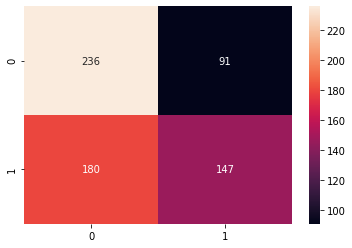

RandomForestClassifier:
               precision    recall  f1-score   support

           0       0.61      0.59      0.60       327
           1       0.60      0.62      0.61       327

    accuracy                           0.60       654
   macro avg       0.60      0.60      0.60       654
weighted avg       0.60      0.60      0.60       654



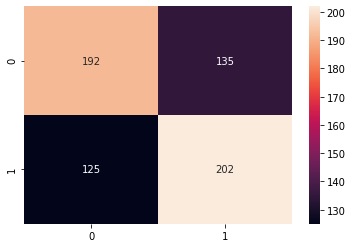

In [ ]:
# Kroswalidacja i wyniki dla wszystkich modeli
for clf in (log_clf, knn_clf, svc_clf, tree_clf, tree_recall_clf, gnb_clf, mnb_clf, voting_clf, bagging_clf, boosting_clf, forest_clf):
  predicted, true = [], []
  for train_index, test_index in StratifiedKFold(n_splits=5, shuffle=True, random_state=42).split(X_downsample, y_downsample):
    X_train, X_test = X_downsample.iloc[train_index], X_downsample.iloc[test_index]
    y_train, y_test = y_downsample.iloc[train_index], y_downsample.iloc[test_index]
    clf.fit(X=X_train, y=y_train)
    predicted.extend(clf.predict(X_test))
    true.extend(y_test)
  print(f"{clf.__class__.__name__}:\n {classification_report(true, predicted)}")
  cm = confusion_matrix(true, predicted)
  sns.heatmap(cm, annot=True, fmt='d')
  plt.show()

W UNDERSAMPLING ciężko wyłonić zdecydowanego zwycięzcę. Wszystkie modele wypadły znacznie gorzej niż przy OVERSAMPLINGu.

RandomForestClassifier:
               precision    recall  f1-score   support

           0       0.86      0.63      0.73       265
           1       0.36      0.67      0.47        82

    accuracy                           0.64       347
   macro avg       0.61      0.65      0.60       347
weighted avg       0.74      0.64      0.67       347



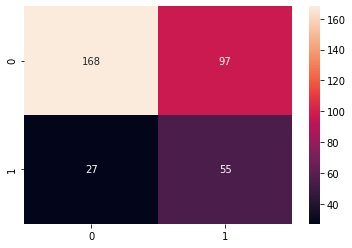

In [ ]:
print(f"{forest_clf.__class__.__name__}:\n {classification_report(y_test_final, forest_clf.predict(X_test_final))}")
cm = confusion_matrix(y_test_final, forest_clf.predict(X_test_final))
sns.heatmap(cm, annot=True, fmt='d')

SVC
              precision    recall  f1-score   support

           0       0.81      0.69      0.74       265
           1       0.33      0.49      0.39        82

    accuracy                           0.64       347
   macro avg       0.57      0.59      0.57       347
weighted avg       0.70      0.64      0.66       347



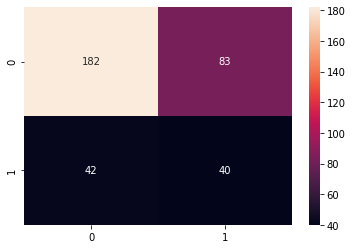

In [ ]:
print(f'{svc_clf.__class__.__name__}\n{classification_report(y_test_final, svc_clf.predict(X_test_final))}')
cm = confusion_matrix(y_test_final, svc_clf.predict(X_test_final))
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

Jak widać modele wyuczone na danych train_rest w OVERSAMPLINGU dają lepszee rezultaty niż te po UNDERSAMPLINGu. W obu przypadkach zdecydowanie zwięskza się wykrywalność mieszkań w centrum.

#Zczytywanie ulic

In [ ]:
from bs4 import BeautifulSoup
import requests
import re

In [ ]:
def get_page(url): # przygotowanie zupki przy użyciu biblioteki BeautifulSoup. Zupka to obiekt, na który składa się cała wartość pobieranej strony internetowej (tę pobiera się zaś przy użyciu biblioteki request)

    r = requests.get(url) # pobieranie zawartości strony - https://requests.readthedocs.io/en/master/

    if not r.ok: # weryfikacja, czy strona odpowiada - odpowiedź "200" to odpowiedź pozytywna - w tym 'ifie' wyświetlamy kod błędu, jeśli taki wystąpił
        print('Server responded: ', r.status_code)
    else:
        print('Server responded correctly: ', r.status_code)
        encoding = r.encoding if 'charset' in r.headers.get('content-type', '').lower() else None # namęczyłem się z tym strasznie - mała uwaga - BeautifulSoup ropzoznaje kodowanie strony automatycznej, niestety nie zawsze
        soup = BeautifulSoup(r.content, from_encoding=encoding)                                   # mu się udaje. Stworzenie zmiennej "encoding", przeszukuje "siłowo" zawartość strony w poszukiwaniu kodowania.
    return soup    # stworzenie i zwrócenie (hehe) gotowej zupki                                  # Dla języka polskiego to np windows-1250 albo utf-8 (w tym przypadku utf-8). Bez dekodowania polskie znaki byłyby krzaczkami

def extractor(soup): # funkcja, która pozwala wyciągnąć wszystko, czego oczekujemy ze strony - https://www.crummy.com/software/BeautifulSoup/bs4/doc/ (przeglądarka u mnie wskazuje stronę jako niebezpieczną,
                                                                                                  # ale to oficjalna strona biblioteki BeautifulSoup)

    streets = [i.text for i in soup.find_all('div') if str(i).count('col-sm-6') >= 1] # stworzenie listy, która będzie zawierała wszystkie ulice w Poznaniu, wraz z dzielnicami, w których się znajdują. Na tym etapie to jeden
    streets.remove(streets[0]) # pierwszy element listy odnosi się do navbaru         # string, podzielimy to wszystko później. W tym miejscu - soup.find_all('div') - wywołujemy metodę na obiekcie zupki. 
    return streets             # dlatego go wywaliłem                                 # Find_all wyszukuje wszystkie elementy typu <div>. <div> to element struktury strony w HTML, oznacza podział na sekcje.
                                                                                      
def street_district(streets):

    return {street.replace((''.join(re.findall(r'.*?\[(.*)].*',street))),'').replace('[]','').replace('ul.',''): # dict comprehension - co tu się właściwie dzieje? Działamy na liście stworzonej w funkcji extractor.
            (''.join(re.findall(r'.*?\[(.*)].*',street)))                                                        # Street to element listy - string, który wygląda przykładowo tak ul. Miśnieńska [Grunwald].
            for street in streets}                                                                               # Najpierw klucz (key) słownika - czyli nazwa naszej ulicy.
                                                                                                                 # street.replace ma na celu wyrzucanie zbędnych elementów stringa (.replace świetnie nadaje się do
                                                                                                                 # wywalania 'substringów). Wywalamy tutaj 'ul.', następnie '[]', a z pomocą biblioteki 're' - 
                                                                                                                 # która służy do wyszukiwania wyrażeń regularnych (regular expressions) szukamy tego, co jest pomiędzy
                                                                                                                 # kwadratowymi nawiasami. https://docs.python.org/3/library/re.html - .*?\[(.*)].* <- to jest określona
                                                                                                                 # ekspresja, której funkcja findall ma szukać w stringu. Oznacza tyle, co "znajdź to, co jest między []".
                                                                                                                 # To również wywalamy z naszej nazwy ulicy - bo ma iść do wartości, a nie do klucza w słowniku.
                                                                                                                 # Ten sam regex (regular expression) zastosowany jest do wygenerowania wartości (czyli dzielnicy) 
                                                                                                                 

soup.find_all('div') - Skąd wiemy, że akurat ten element należy wpisać w soup.find_all? Wynika to ze struktury HTML, na podstawie której została postawiona strona. Niestety - nie da się zautomatyzować tego procesu. Każda strona, nazewnictwo klas poszczególnych elementów, umiejscowienie tego, co nas interesuje, różnią się od siebie. Na jakiejkolwiek stronie kliknijcie prawym przyciskiem myszy, a nastepnie "Zbadaj element" (dla Opery). To właśnie z tego tworzymy zupkę przy pomocy request i BeautifulSoup. Dalej, po soup.find_all('div') mamy instrukcję warunkową - if str(i).count('col-sm-6') >= 1 . Oznacza ona tyle, że jeśli w stringu danego diva, którego znalazł find_all jest nazwa klasy 'col-sm-6' to jest właśnie to ,czego szukamy, a odrzucamy całą resztę. Nazwę klasy również znajdziemy w zupce, trzeba ją po prostu wyszukać. Spis ulic Poznania jest zrobiony na tyle dobrze, że wszystkie ulice znajdziemy pod 'div' tej samej klasym, więc dla wszystkich 2302 ulic, potrzebujemy tylko jednej linijki kodu. 

In [ ]:
url = 'http://mapa.livecity.pl/ulice/Poznań,0969400,1' # url do stronki z ulicami Poznania

street_dict = street_district(extractor(get_page(url))) # słyszałem, że lubicie funkcje, więc wsadziłem funkcję, w funkcję, która jest w funkcji
data_district = pd.DataFrame.from_dict(street_dict, orient='index', columns=['District']) # tworzymy dataframe 
data_hot_district = pd.get_dummies(data_district) # przekształcamy metodą one hot vector 
data_hot_district

Server responded correctly:  200


,District_Grunwald,District_Jeżyce,District_Nowe Miasto,District_Stare Miasto,District_Wilda
Miśnieńska,1,0,0,0,0
Słowicza,1,0,0,0,0
Niecała,1,0,0,0,0
Boczna,1,0,0,0,0
Budziszyńska,1,0,0,0,0
...,...,...,...,...,...
Bohaterów Westerplatte,0,0,0,0,1
Jodłowa,0,0,0,0,1
ks. Jakuba Wujka,0,0,0,0,1
Korzenna,0,0,0,0,1


In [ ]:
location = pd.get_dummies(gratkapl_centrum_filtered[['Expected', 'Rooms', 'SqrMeters', 'Floor', 'Location']], columns=['Location'], drop_first=False)

In [ ]:
location.shape, gratkapl_centrum_filtered.shape, X.shape , y.shape

((1733, 992), (1733, 7), (1733, 4), (1733,))

In [ ]:
location.head()

,Expected,Rooms,SqrMeters,Floor,Location_Plewiska Rosnowo Komorniki Poznań,Location_Plewiska Rosnowo Komorniki Poznań Rosnowo,Location_Poznan Grunwald Ogrody Jężyce ul. Giżycka Ul.,Location_Poznan Grunwald ul. Grunwaldzka,Location_Poznan Stare Miasto ul. Szarych Szeregów,Location_Poznan ul. Fredry,Location_Poznan ul. Topolowa,Location_Poznań,Location_Poznań,Location_Poznań Antoninek ul. Mścibora,Location_Poznań Antoninek ul. Sędziewoja,Location_Poznań Antoninek ul. Ziemowita,Location_Poznań Baranowo Baranowo ul. Szamotulska,Location_Poznań Bonin ul. Lazurowa,Location_Poznań Bonin ul. Turkusowa,Location_Poznań Czapury,Location_Poznań Dębiec,Location_Poznań Dębiec Wilda Niski Blok Okazja!!! ul. Azaliowa,Location_Poznań Dębiec Wilda Rataje Łazarz ul. Osinowa - Dobra Cena!!!,Location_Poznań Dębiec Wilda ul. Czechosłowacka,Location_Poznań Dębiec Wilda Łazarz ul. Azaliowa,Location_Poznań Dębiec ul. Azaliowa,Location_Poznań Dębiec ul. Czechosłowacka,Location_Poznań Dębiec ul. Czeremchowa,Location_Poznań Dębiec ul. Dębiec,Location_Poznań Dębiec ul. Jaworowa Łozowa Klonowa,Location_Poznań Dębiec ul. Klonowa,Location_Poznań Dębiec ul. Limbowa,Location_Poznań Dębiec ul. Os. Dębina,Location_Poznań Dębiec ul. Łozowa Azaliowa,Location_Poznań Dębiec ul. Łozowa Kasztanowa,Location_Poznań Dębiec ul. Żurawinowa,Location_Poznań Dębina ul. Dębina,Location_Poznań Garbary Stare Miasto Starówka ul. Garbary,Location_Poznań Garbary Stare Miasto Starówka ul. Szewska,Location_Poznań Garbary Stare Miasto Wilda ul. 25M2 Po Remoncie,...,Location_Poznań Łazarz Grunwald ul. Kanałowa,Location_Poznań Łazarz Grunwald ul. Limanowskiego,Location_Poznań Łazarz Grunwald ul. Małeckiego,Location_Poznań Łazarz Grunwald ul. Ul. Małeckiego - Piękne Przestronne Mies,Location_Poznań Łazarz Grunwald ul. Załęże,Location_Poznań Łazarz Grunwald ul. Łukaszewicza,Location_Poznań Łazarz Górczyn Wilda ul. Klaudyny Potockiej,Location_Poznań Łazarz Wilda Górczyn Grunwald ul. Łukaszewicza - Mieszkanie Z Balkonem!!!,Location_Poznań Łazarz Wilda Jeżyce ul. Keliera Ul.,Location_Poznań Łazarz Wilda Jeżyce ul. Krauthofera Ul.,Location_Poznań Łazarz Wilda ul. Łukaszewicza,Location_Poznań Łazarz ul. Chociszewskiego,Location_Poznań Łazarz ul. Ciche I Słoneczne W Oficynie Blisko Mtp,Location_Poznań Łazarz ul. Dmowskiego,Location_Poznań Łazarz ul. Grottgera,Location_Poznań Łazarz ul. Grottgera 15/19,Location_Poznań Łazarz ul. Grottgera 15/20,Location_Poznań Łazarz ul. Hetmańska,Location_Poznań Łazarz ul. Hetmańska / Głogowska,Location_Poznań Łazarz ul. Kanałowa,Location_Poznań Łazarz ul. Kasprzaka 13,Location_Poznań Łazarz ul. Lodowa,Location_Poznań Łazarz ul. Lodowa/Załęże,Location_Poznań Łazarz ul. Marcelego Mottego,Location_Poznań Łazarz ul. Małeckiego Po Remoncie!,Location_Poznań Łazarz ul. Mottego,Location_Poznań Łazarz ul. Niegolewskich,Location_Poznań Łazarz ul. Po Kapitalnym Remoncie,Location_Poznań Łazarz ul. Sczanieckiej,Location_Poznań Łazarz ul. Strusia,Location_Poznań Łazarz ul. Łukasiewicza,Location_Poznań Łazarz ul. Łukaszewicza,Location_Poznań Śródka,Location_Poznań Śródka Rataje ul. Piastowskie Os.,Location_Poznań Śródka Zawady Rataje Wilda ul. Tomickiego - Ładny Układ!!!,Location_Poznań Świerczewo,Location_Poznań-Grunwald,Location_Poznań-Grunwald Grunwald,Location_Poznań-Nowe Miasto Rataje ul. Falista,Location_Poznań-Stare Miasto Stare Miasto
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
155,270108,2,44.280,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
362,200000,2,38.000,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,269000,3,55.000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
685,244057,2,40.340,2,0,0,0,

LogisticRegression:
               precision    recall  f1-score   support

           0       0.77      1.00      0.87      1324
           1       0.88      0.05      0.10       409

    accuracy                           0.77      1733
   macro avg       0.83      0.53      0.49      1733
weighted avg       0.80      0.77      0.69      1733



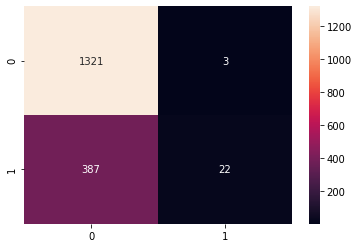

KNeighborsClassifier:
               precision    recall  f1-score   support

           0       0.77      0.97      0.86      1324
           1       0.38      0.06      0.10       409

    accuracy                           0.76      1733
   macro avg       0.58      0.51      0.48      1733
weighted avg       0.68      0.76      0.68      1733



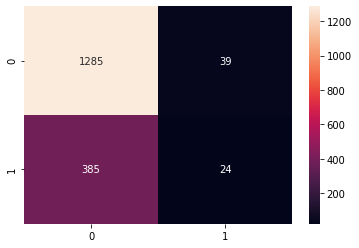

SVC:
               precision    recall  f1-score   support

           0       0.80      0.86      0.83      1324
           1       0.40      0.30      0.34       409

    accuracy                           0.73      1733
   macro avg       0.60      0.58      0.58      1733
weighted avg       0.70      0.73      0.71      1733



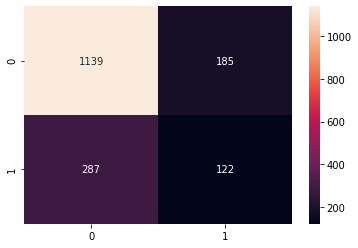

DecisionTreeClassifier:
               precision    recall  f1-score   support

           0       0.78      1.00      0.88      1324
           1       1.00      0.09      0.16       409

    accuracy                           0.78      1733
   macro avg       0.89      0.54      0.52      1733
weighted avg       0.83      0.78      0.71      1733



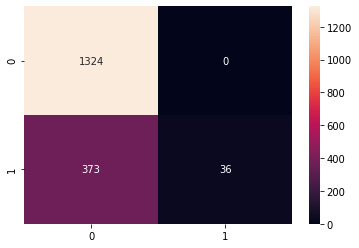

DecisionTreeClassifier:
               precision    recall  f1-score   support

           0       0.80      0.98      0.88      1324
           1       0.76      0.20      0.31       409

    accuracy                           0.80      1733
   macro avg       0.78      0.59      0.60      1733
weighted avg       0.79      0.80      0.75      1733



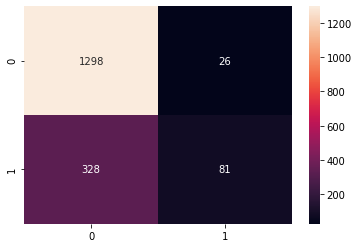

GaussianNB:
               precision    recall  f1-score   support

           0       0.76      1.00      0.87      1324
           1       0.00      0.00      0.00       409

    accuracy                           0.76      1733
   macro avg       0.38      0.50      0.43      1733
weighted avg       0.58      0.76      0.66      1733



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


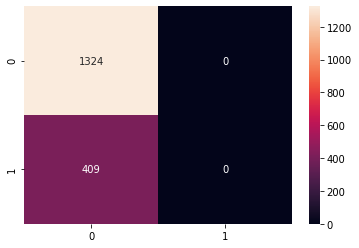

MultinomialNB:
               precision    recall  f1-score   support

           0       0.78      1.00      0.88      1324
           1       0.91      0.11      0.19       409

    accuracy                           0.79      1733
   macro avg       0.85      0.55      0.53      1733
weighted avg       0.81      0.79      0.71      1733



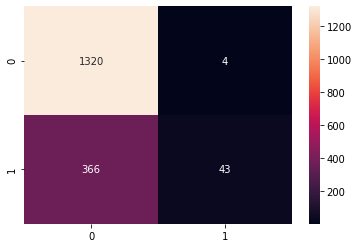

VotingClassifier:
               precision    recall  f1-score   support

           0       0.79      0.99      0.88      1324
           1       0.77      0.13      0.22       409

    accuracy                           0.79      1733
   macro avg       0.78      0.56      0.55      1733
weighted avg       0.78      0.79      0.72      1733



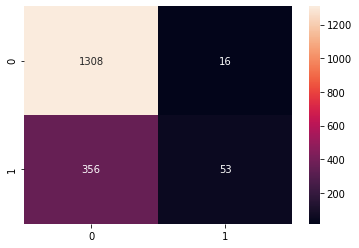

BaggingClassifier:
               precision    recall  f1-score   support

           0       0.76      0.95      0.85      1324
           1       0.25      0.06      0.10       409

    accuracy                           0.74      1733
   macro avg       0.51      0.50      0.47      1733
weighted avg       0.64      0.74      0.67      1733



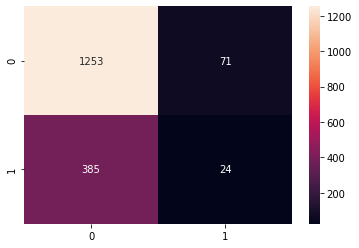

AdaBoostClassifier:
               precision    recall  f1-score   support

           0       0.79      0.90      0.84      1324
           1       0.38      0.21      0.27       409

    accuracy                           0.73      1733
   macro avg       0.58      0.55      0.55      1733
weighted avg       0.69      0.73      0.70      1733



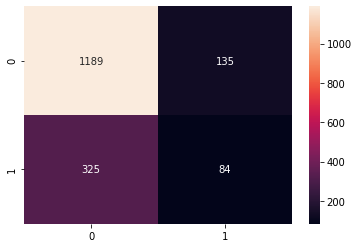

RandomForestClassifier:
               precision    recall  f1-score   support

           0       0.78      1.00      0.87      1324
           1       1.00      0.07      0.12       409

    accuracy                           0.78      1733
   macro avg       0.89      0.53      0.50      1733
weighted avg       0.83      0.78      0.70      1733



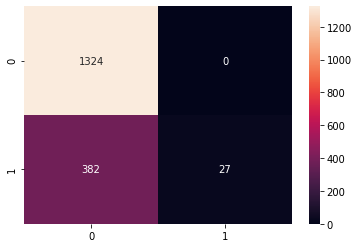

In [ ]:
# Kroswalidacja i wyniki dla wszystkich modeli
for clf in (log_clf, knn_clf, svc_clf, tree_clf, tree_recall_clf, gnb_clf, mnb_clf, voting_clf, bagging_clf, boosting_clf, forest_clf):
  predicted, true = [], []
  for train_index, test_index in StratifiedKFold(n_splits=5, shuffle=True, random_state=42).split(location, y):
    X_train, X_test = location.iloc[train_index], location.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf.fit(X=X_train, y=y_train)
    predicted.extend(clf.predict(X_test))
    true.extend(y_test)
  print(f"{clf.__class__.__name__}:\n {classification_report(true, predicted)}")
  cm = confusion_matrix(true, predicted)
  sns.heatmap(cm, annot=True, fmt='d')
  plt.show()

Rozszerzenie danych do uczenia modelu o przekształcone dane z feature'a location poprawiły niektóre modele, ale zarazem pogorszyły inne. LR wypadł lepiej, ale RandoForest się pogorszył.

In [ ]:
gratkapl_centrum_filtered[gratkapl_centrum_filtered.Location == 'Poznań ']

,Expected,Rooms,SqrMeters,Floor,Location,Centre,Description
Id,,,,,,,
3195,255000,2,40.890,1,Poznań,1,MIESZKANIE 2 POKOJE - ZREWITALIZOWANA KAMIENIC...
966,284211,2,41.000,5,Poznań,1,NOWE DWUPOKOJOWE MIESZKANIE Z BALKONEM. WINDA....
4666,420000,2,65.000,1,Poznań,1,Na sprzedaż dwupokojowe mieszkanie o powierzch...
4363,390000,3,76.000,2,Poznań,1,Polecamy na sprzedaż funkcjonalne 3 pokojowe (...
3871,299000,2,48.480,1,Poznań,1,Zachęcam do zapoznania się z ofertą sprzedaży ...
3216,225000,3,68.000,3,Poznań,1,NA SPRZEDAŻ MIESZKANIE 3 POKOJOWE W ŚCISŁYM CE...
676,166950,1,31.500,2,Poznań,1,0% PROWIZJI OD KUPUJĄCEGO !!!!!! Oferujemy na ...
55,230767,2,47.300,1,Poznań,1,NAJWIĘKSZA OFERTA RYNKU PIERWOTNEGO W WIELKOPO...
4326,424859,3,72.000,3,Poznań,1,TRZYPOKOJOWE NOWE MIESZKANIE DO WŁASNEJ ARANŻA...


In [ ]:
data_district

,District
Miśnieńska,Grunwald
Słowicza,Grunwald
Niecała,Grunwald
Boczna,Grunwald
Budziszyńska,Grunwald
...,...
Bohaterów Westerplatte,Wilda
Jodłowa,Wilda
ks. Jakuba Wujka,Wilda
Korzenna,Wilda
